In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset

In [29]:
# Load dataset
df = pd.read_csv("scores_data.csv")

In [30]:
# Basic overview of the data
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [31]:
df.shape

(149, 3)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


### Checking Null Values

In [33]:
df.isna().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

### Checking Duplicated Values

In [55]:
df["User_ID"].duplicated().sum()

np.int64(0)

In [34]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

### Clean Column Names

In [35]:
# Clean Column Names
df.columns = df.columns.str.strip()

In [36]:
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

### Change Data Types

In [37]:
# Extract obtained score from "x/7"
df["Score"] = (df["Score"].str.split("/").str[0].astype(int))

In [38]:
print(df.head())

        Batch  User_ID  Score
0  AI_ELITE_7  uid_149      6
1  AI_ELITE_7  uid_148      6
2  AI_ELITE_7  uid_147      7
3  AI_ELITE_7  uid_146      7
4  AI_ELITE_7  uid_145      4


In [39]:
print(df.dtypes)

Batch      object
User_ID    object
Score       int64
dtype: object


###  Descriptive statistics by Batch

In [40]:
# Descriptive statistics by Batch
batch_stats = df.groupby("Batch")["Score"].describe()
print("Batch-wise Descriptive Statistics:\n", batch_stats, "\n")

Batch-wise Descriptive Statistics:
             count      mean       std  min  25%  50%   75%  max
Batch                                                          
AI_ELITE_4   48.0  3.791667  1.443376  0.0  3.0  4.0  4.25  7.0
AI_ELITE_6   48.0  4.229167  1.640441  0.0  3.0  4.0  5.00  7.0
AI_ELITE_7   53.0  5.056604  1.446682  2.0  4.0  5.0  6.00  7.0 



In [41]:
# Average score per batch
avg_score = df.groupby("Batch")["Score"].mean()
print("Average Score per Batch:\n",avg_score)

Average Score per Batch:
 Batch
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
Name: Score, dtype: float64


In [43]:
# Percentage Score
(df["Score"]/7)*100

0       85.714286
1       85.714286
2      100.000000
3      100.000000
4       57.142857
          ...    
144     57.142857
145     57.142857
146     57.142857
147     42.857143
148     28.571429
Name: Score, Length: 149, dtype: float64

In [45]:
median_scores = df.groupby("Batch")["Score"].median()
print("Median Score per Batch:\n", median_scores, "\n")

Median Score per Batch:
 Batch
AI_ELITE_4    4.0
AI_ELITE_6    4.0
AI_ELITE_7    5.0
Name: Score, dtype: float64 



<Axes: xlabel='Batch'>

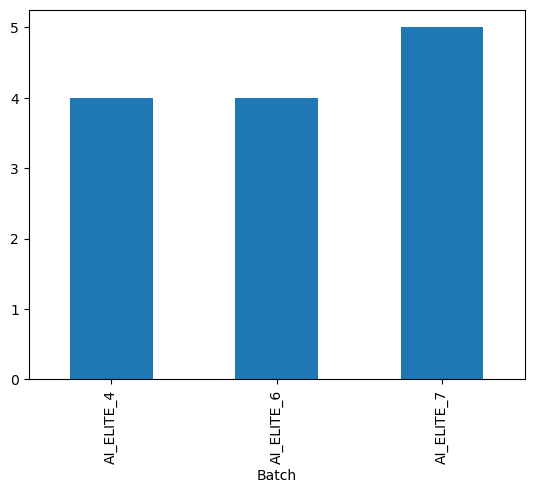

In [59]:
df.groupby("Batch")["Score"].median().plot(kind="bar")

In [46]:
# Count of students per batch
student_count_per_batch = df.groupby("Batch")["User_ID"].count()
print(student_count_per_batch)

Batch
AI_ELITE_4    48
AI_ELITE_6    48
AI_ELITE_7    53
Name: User_ID, dtype: int64


<Axes: xlabel='Batch'>

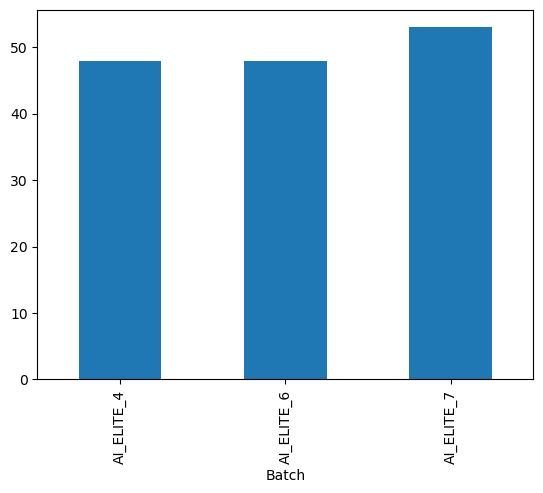

In [57]:
df.groupby("Batch")["User_ID"].count().plot(kind="bar")

In [48]:
# High Scores (6 or 7)
df[df["Score"]>=6][:5]

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6
1,AI_ELITE_7,uid_148,6
2,AI_ELITE_7,uid_147,7
3,AI_ELITE_7,uid_146,7
5,AI_ELITE_7,uid_144,7


In [50]:
high_scorers = df[df["Score"]>=6].groupby("Batch")["User_ID"].count()
print("High Scorers (Score >= 6):\n", high_scorers, "\n")

High Scorers (Score >= 6):
 Batch
AI_ELITE_4     4
AI_ELITE_6     9
AI_ELITE_7    23
Name: User_ID, dtype: int64 



In [52]:
# low Scores (0 to 2)
low_scorers = df[df["Score"] <= 2].groupby("Batch")["User_ID"].count()
print("Low Scorers (Score <= 2):\n", low_scorers, "\n")

Low Scorers (Score <= 2):
 Batch
AI_ELITE_4    9
AI_ELITE_6    6
AI_ELITE_7    2
Name: User_ID, dtype: int64 



In [53]:
score_distribution = df.groupby(["Batch", "Score"]).size().unstack(fill_value=0)
print("Score Distribution per Batch:\n", score_distribution)

Score Distribution per Batch:
 Score       0  1  2  3   4   5   6   7
Batch                                 
AI_ELITE_4  1  1  7  8  19   8   1   3
AI_ELITE_6  1  2  3  9  11  13   4   5
AI_ELITE_7  0  0  2  7  10  11  13  10


## AI_ELITE_7 (Top Performing Batch)

- Highest average score: ~5.06

- Median score: 5

- Strong concentration of students scoring 5, 6, and 7

- No very low scores (0 or 1) → indicates consistent understanding

- Best batch in terms of both performance and consistency

**Insight:**
This batch shows strong mastery of concepts, with many high achievers and minimal weak performers.

### AI_ELITE_6 (Moderate Performance)

- Average score: ~4.23

- Median score: 4

- Wide spread of scores from 0 to 7

- Majority of students scored 4 or 5

- Some high scorers, but also presence of low scores (0–2)

**Insight:**
This is a mixed-performance batch. While several students perform well, there is noticeable variability, suggesting uneven understanding.

### AI_ELITE_4 (Lowest Performing Batch)

- Lowest average score: ~3.79

- Median score: 4

- Heavy clustering around score = 4

- Very few students scored 6 or 7

- Presence of low scores including 0 and 1

**Insight:**
This batch struggles comparatively, with fewer top performers and a larger proportion of students in the lower-to-mid score range.

### Score Distribution Insights

- **High scorers (6–7):**

       Most common in AI_ELITE_7

       Moderate in AI_ELITE_6

       Rare in AI_ELITE_4

- **Low scorers (0–2):**

        Minimal in AI_ELITE_7

        Present in AI_ELITE_6

        More frequent in AI_ELITE_4